## 1. Importing libraries and initializing global variables

In [16]:
import torch
import torchaudio
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import matplotlib.pyplot as plt
from transformers.audio_utils import spectrogram

## 2. Loading the audio file

In [29]:
waveform, sample_rate = torchaudio.load("audio.wav")
waveform_resampled = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(waveform)
print(waveform_resampled)

tensor([[-3.9151e-06, -8.9350e-06,  2.4292e-07,  ..., -1.9486e-03,
         -1.8901e-03, -6.7823e-04],
        [ 7.0467e-06, -1.1997e-05, -6.7977e-06,  ..., -1.9368e-03,
         -1.8925e-03, -6.7417e-04]])


## 3. Preprocessing the audio file

In [37]:
mfcc_transform = torchaudio.transforms.MFCC(sample_rate=sample_rate)
mfcc = mfcc_transform(waveform_resampled)[0]

## 4. Using Wav2Vec2 model for Speech Recognition

In [38]:
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## 5. Visualization

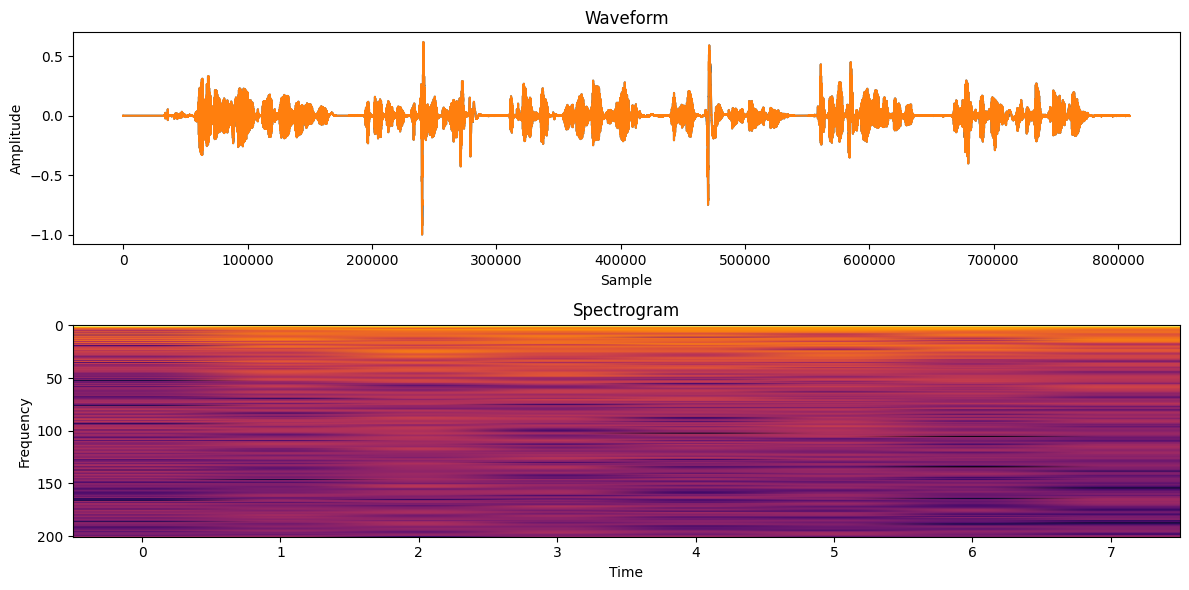

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(waveform.t().numpy())
plt.title("Waveform")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
spectrogram = torchaudio.transforms.Spectrogram()(mfcc)
spectrogram_channel1 = spectrogram[0, :, :]
plt.imshow(spectrogram_channel1.log2().numpy(), aspect="auto", cmap="inferno")
plt.title("Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## 6. Processing the audio

In [40]:
with torch.inference_mode():
    logits = model(waveform_resampled).logits
predicted_ids = torch.argmax(logits, dim=-1)
transcription = processor.batch_decode(predicted_ids)

## 7. Printing the processed transcription

In [41]:
print(f"Transcription: {transcription}")

Transcription: ['THE STALE SMELL OF OLD BEER LINGERS IT TAKES HEAT TO BRING OUT THE ODOUR A COLD DIP RESTORES HEALTH AND ZEST A SALT PICKLE TASTES FINE WITH HAM TAKOZAL PASTOR ARE MY FAVORITE A ZESTFUL FOOD IS THE HOT CROSS BUN', 'THE STALE SMELL OF OLD BEER LINGERS IT TAKES HEAT TO BRING OUT THE ODOR A COLD DIP RESTORES HEALTH AND ZEST A SALT PICKLE TASTES FINE WITH HAM TAKOZAL PASTOR ARE MY FAVORITE A ZESTFUL FOOD IS THE HOT CROSS BUN']


In [6]:
import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
from diffusers.utils import export_to_video

pipe = DiffusionPipeline.from_pretrained("damo-vilab/text-to-video-ms-1.7b", torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

prompt = "Spiderman is surfing"
video_frames = pipe(prompt, num_inference_steps=25).frames
video_path = export_to_video(video_frames)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

It is recommended to use `export_to_video` with `imageio` and `imageio-ffmpeg` as a backend. 
These libraries are not present in your environment. Attempting to use legacy OpenCV backend to export video. 
Support for the OpenCV backend will be deprecated in a future Diffusers version


ValueError: too many values to unpack (expected 3)